In [6]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input/catch-me-if-you-can-alice-no-original'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/catch-me-if-you-can-alice-no-original/sample_submission.csv
/kaggle/input/catch-me-if-you-can-alice-no-original/train_sessions.csv
/kaggle/input/catch-me-if-you-can-alice-no-original/site_dic.pkl
/kaggle/input/catch-me-if-you-can-alice-no-original/test_sessions.csv
/kaggle/input/catch-me-if-you-can-alice-no-original/train/nothing.csv


In [4]:
train_df = pd.read_csv('/kaggle/input/catch-me-if-you-can-alice-no-original/train_sessions.csv')
test_df = pd.read_csv('/kaggle/input/catch-me-if-you-can-alice-no-original/test_sessions.csv')

In [29]:
PATH_TO_DATA = r'/kaggle/input/catch-me-if-you-can-alice-no-original'

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter

In [7]:
train_df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,session_id,site1,time1,site2,time2,site3,time3,site4,time4,site5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
0,1,718,2014-02-20 10:02:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2,890,2014-02-22 11:19:50,941.0,2014-02-22 11:19:50,3847.0,2014-02-22 11:19:51,941.0,2014-02-22 11:19:51,942.0,...,2014-02-22 11:19:51,3847.0,2014-02-22 11:19:52,3846.0,2014-02-22 11:19:52,1516.0,2014-02-22 11:20:15,1518.0,2014-02-22 11:20:16,0
2,3,14769,2013-12-16 16:40:17,39.0,2013-12-16 16:40:18,14768.0,2013-12-16 16:40:19,14769.0,2013-12-16 16:40:19,37.0,...,2013-12-16 16:40:19,14768.0,2013-12-16 16:40:20,14768.0,2013-12-16 16:40:21,14768.0,2013-12-16 16:40:22,14768.0,2013-12-16 16:40:24,0
3,4,782,2014-03-28 10:52:12,782.0,2014-03-28 10:52:42,782.0,2014-03-28 10:53:12,782.0,2014-03-28 10:53:42,782.0,...,2014-03-28 10:54:42,782.0,2014-03-28 10:55:12,782.0,2014-03-28 10:55:42,782.0,2014-03-28 10:56:12,782.0,2014-03-28 10:56:42,0
4,5,22,2014-02-28 10:53:05,177.0,2014-02-28 10:55:22,175.0,2014-02-28 10:55:22,178.0,2014-02-28 10:55:23,177.0,...,2014-02-28 10:55:59,175.0,2014-02-28 10:55:59,177.0,2014-02-28 10:55:59,177.0,2014-02-28 10:57:06,178.0,2014-02-28 10:57:11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253556,253557,3474,2013-11-25 10:26:54,3474.0,2013-11-25 10:26:58,141.0,2013-11-25 10:27:03,2428.0,2013-11-25 10:27:04,106.0,...,2013-11-25 10:27:16,2428.0,2013-11-25 10:27:28,2428.0,2013-11-25 10:27:40,2428.0,2013-11-25 10:27:52,148.0,2013-11-25 10:27:53,0
253557,253558,12727,2013-03-12 16:01:15,12727.0,2013-03-12 16:01:16,2215.0,2013-03-12 16:01:16,38.0,2013-03-12 16:01:17,2215.0,...,2013-03-12 16:01:17,25444.0,2013-03-12 16:01:18,2215.0,2013-03-12 16:01:18,23.0,2013-03-12 16:01:18,21.0,2013-03-12 16:01:18,0
253558,253559,2661,2013-09-12 14:05:03,15004.0,2013-09-12 14:05:10,5562.0,2013-09-12 14:05:10,5562.0,2013-09-12 14:06:29,5562.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
253559,253560,812,2013-12-19 15:20:22,676.0,2013-12-19 15:20:22,814.0,2013-12-19 15:20:22,22.0,2013-12-19 15:20:22,39.0,...,2013-12-19 15:20:23,814.0,2013-12-19 15:20:23,570.0,2013-12-19 15:20:23,22.0,2013-12-19 15:20:24,570.0,2013-12-19 15:20:24,0


In [8]:
test_df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,session_id,site1,time1,site2,time2,site3,time3,site4,time4,site5,...,site6,time6,site7,time7,site8,time8,site9,time9,site10,time10
0,1,29,2014-10-04 11:19:53,35.0,2014-10-04 11:19:53,22.0,2014-10-04 11:19:54,321.0,2014-10-04 11:19:54,23.0,...,2211.0,2014-10-04 11:19:54,6730.0,2014-10-04 11:19:54,21.0,2014-10-04 11:19:54,44582.0,2014-10-04 11:20:00,15336.0,2014-10-04 11:20:00
1,2,782,2014-07-03 11:00:28,782.0,2014-07-03 11:00:53,782.0,2014-07-03 11:00:58,782.0,2014-07-03 11:01:06,782.0,...,782.0,2014-07-03 11:01:10,782.0,2014-07-03 11:01:23,782.0,2014-07-03 11:01:29,782.0,2014-07-03 11:01:30,782.0,2014-07-03 11:01:53
2,3,55,2014-12-05 15:55:12,55.0,2014-12-05 15:55:13,55.0,2014-12-05 15:55:14,55.0,2014-12-05 15:56:15,55.0,...,55.0,2014-12-05 15:56:17,55.0,2014-12-05 15:56:18,55.0,2014-12-05 15:56:19,1445.0,2014-12-05 15:56:33,1445.0,2014-12-05 15:56:36
3,4,1023,2014-11-04 10:03:19,1022.0,2014-11-04 10:03:19,50.0,2014-11-04 10:03:20,222.0,2014-11-04 10:03:21,202.0,...,3374.0,2014-11-04 10:03:22,50.0,2014-11-04 10:03:22,48.0,2014-11-04 10:03:22,48.0,2014-11-04 10:03:23,3374.0,2014-11-04 10:03:23
4,5,301,2014-05-16 15:05:31,301.0,2014-05-16 15:05:32,301.0,2014-05-16 15:05:33,66.0,2014-05-16 15:05:39,67.0,...,69.0,2014-05-16 15:05:40,70.0,2014-05-16 15:05:40,68.0,2014-05-16 15:05:40,71.0,2014-05-16 15:05:40,167.0,2014-05-16 15:05:44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82792,82793,812,2014-10-02 18:20:09,1039.0,2014-10-02 18:20:09,676.0,2014-10-02 18:20:09,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82793,82794,300,2014-05-26 14:16:40,302.0,2014-05-26 14:16:41,302.0,2014-05-26 14:16:44,300.0,2014-05-26 14:16:44,300.0,...,1222.0,2014-05-26 14:17:19,302.0,2014-05-26 14:17:19,1218.0,2014-05-26 14:17:19,1221.0,2014-05-26 14:17:19,1216.0,2014-05-26 14:17:19
82794,82795,29,2014-05-02 11:21:56,33.0,2014-05-02 11:21:56,35.0,2014-05-02 11:21:56,22.0,2014-05-02 11:22:03,37.0,...,6779.0,2014-05-02 11:22:03,30.0,2014-05-02 11:22:03,21.0,2014-05-02 11:22:04,23.0,2014-05-02 11:22:04,6780.0,2014-05-02 11:22:04
82795,82796,5828,2014-05-03 10:05:25,23.0,2014-05-03 10:05:27,21.0,2014-05-03 10:05:27,804.0,2014-05-03 10:05:27,21.0,...,3350.0,2014-05-03 10:05:37,23.0,2014-05-03 10:05:37,894.0,2014-05-03 10:05:38,21.0,2014-05-03 10:05:38,961.0,2014-05-03 10:05:38


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253561 entries, 0 to 253560
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   session_id  253561 non-null  int64  
 1   site1       253561 non-null  int64  
 2   time1       253561 non-null  object 
 3   site2       250098 non-null  float64
 4   time2       250098 non-null  object 
 5   site3       246919 non-null  float64
 6   time3       246919 non-null  object 
 7   site4       244321 non-null  float64
 8   time4       244321 non-null  object 
 9   site5       241829 non-null  float64
 10  time5       241829 non-null  object 
 11  site6       239495 non-null  float64
 12  time6       239495 non-null  object 
 13  site7       237297 non-null  float64
 14  time7       237297 non-null  object 
 15  site8       235224 non-null  float64
 16  time8       235224 non-null  object 
 17  site9       233084 non-null  float64
 18  time9       233084 non-null  object 
 19  si

In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82797 entries, 0 to 82796
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   session_id  82797 non-null  int64  
 1   site1       82797 non-null  int64  
 2   time1       82797 non-null  object 
 3   site2       81308 non-null  float64
 4   time2       81308 non-null  object 
 5   site3       80075 non-null  float64
 6   time3       80075 non-null  object 
 7   site4       79182 non-null  float64
 8   time4       79182 non-null  object 
 9   site5       78341 non-null  float64
 10  time5       78341 non-null  object 
 11  site6       77566 non-null  float64
 12  time6       77566 non-null  object 
 13  site7       76840 non-null  float64
 14  time7       76840 non-null  object 
 15  site8       76151 non-null  float64
 16  time8       76151 non-null  object 
 17  site9       75484 non-null  float64
 18  time9       75484 non-null  object 
 19  site10      74806 non-nul

In [ ]:
with open('/kaggle/input/catch-me-if-you-can-alice-no-original/site_dic.pkl', 'rb') as f:
    site_dict = pickle.load(f)

print(site_dict)

In [15]:
id_to_site = {v: k for k, v in site_dict.items()}
print(id_to_site[890])

maps.google.com


In [20]:
site_cols = [f'site{i}' for i in range(1, 11)]

for col in site_cols:
    train_df[f'{col}_name'] = train_df[col].map(id_to_site)

In [26]:
train_df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,session_id,site1,time1,site2,time2,site3,time3,site4,time4,site5,...,site1_name,site2_name,site3_name,site4_name,site5_name,site6_name,site7_name,site8_name,site9_name,site10_name
0,1,718,2014-02-20 10:02:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,rr.office.microsoft.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,890,2014-02-22 11:19:50,941.0,2014-02-22 11:19:50,3847.0,2014-02-22 11:19:51,941.0,2014-02-22 11:19:51,942.0,...,maps.google.com,mts0.google.com,khms0.google.com,mts0.google.com,mts1.google.com,khms1.google.com,khms0.google.com,khms1.google.com,193.164.197.30,193.164.196.60
2,3,14769,2013-12-16 16:40:17,39.0,2013-12-16 16:40:18,14768.0,2013-12-16 16:40:19,14769.0,2013-12-16 16:40:19,37.0,...,cbk1.googleapis.com,accounts.google.com,cbk0.googleapis.com,cbk1.googleapis.com,twitter.com,accounts.google.com,cbk0.googleapis.com,cbk0.googleapis.com,cbk0.googleapis.com,cbk0.googleapis.com
3,4,782,2014-03-28 10:52:12,782.0,2014-03-28 10:52:42,782.0,2014-03-28 10:53:12,782.0,2014-03-28 10:53:42,782.0,...,annotathon.org,annotathon.org,annotathon.org,annotathon.org,annotathon.org,annotathon.org,annotathon.org,annotathon.org,annotathon.org,annotathon.org
4,5,22,2014-02-28 10:53:05,177.0,2014-02-28 10:55:22,175.0,2014-02-28 10:55:22,178.0,2014-02-28 10:55:23,177.0,...,apis.google.com,fr.wikipedia.org,bits.wikimedia.org,meta.wikimedia.org,fr.wikipedia.org,meta.wikimedia.org,bits.wikimedia.org,fr.wikipedia.org,fr.wikipedia.org,meta.wikimedia.org


In [27]:
train_df.fillna(0, inplace=True)
test_df.fillna(0, inplace=True)

In [28]:
train_df.head()

,session_id,site1,time1,site2,time2,site3,time3,site4,time4,site5,...,site1_name,site2_name,site3_name,site4_name,site5_name,site6_name,site7_name,site8_name,site9_name,site10_name
0,1,718,2014-02-20 10:02:45,0.0,0,0.0,0,0.0,0,0.0,...,rr.office.microsoft.com,0,0,0,0,0,0,0,0,0
1,2,890,2014-02-22 11:19:50,941.0,2014-02-22 11:19:50,3847.0,2014-02-22 11:19:51,941.0,2014-02-22 11:19:51,942.0,...,maps.google.com,mts0.google.com,khms0.google.com,mts0.google.com,mts1.google.com,khms1.google.com,khms0.google.com,khms1.google.com,193.164.197.30,193.164.196.60
2,3,14769,2013-12-16 16:40:17,39.0,2013-12-16 16:40:18,14768.0,2013-12-16 16:40:19,14769.0,2013-12-16 16:40:19,37.0,...,cbk1.googleapis.com,accounts.google.com,cbk0.googleapis.com,cbk1.googleapis.com,twitter.com,accounts.google.com,cbk0.googleapis.com,cbk0.googleapis.com,cbk0.googleapis.com,cbk0.googleapis.com
3,4,782,2014-03-28 10:52:12,782.0,2014-03-28 10:52:42,782.0,2014-03-28 10:53:12,782.0,2014-03-28 10:53:42,782.0,...,annotathon.org,annotathon.org,annotathon.org,annotathon.org,annotathon.org,annotathon.org,annotathon.org,annotathon.org,annotathon.org,annotathon.org
4,5,22,2014-02-28 10:53:05,177.0,2014-02-28 10:55:22,175.0,2014-02-28 10:55:22,178.0,2014-02-28 10:55:23,177.0,...,apis.google.com,fr.wikipedia.org,bits.wikimedia.org,meta.wikimedia.org,fr.wikipedia.org,meta.wikimedia.org,bits.wikimedia.org,fr.wikipedia.org,fr.wikipedia.org,meta.wikimedia.org


In [50]:
site_cols = [f'site{i}' for i in range(1, 11)]
train_df[site_cols] = train_df[site_cols].fillna(0).astype(int)
sessions_as_text = train_df[site_cols].astype(str).agg(' '.join, axis=1)

In [89]:
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(sessions_as_text)

print(X_tfidf.shape)
print(tfidf.get_feature_names_out()[:10])

(253561, 41592)
['10' '100' '1000' '10000' '10001' '10002' '10003' '10004' '10005' '10006']


In [87]:
tfidf = TfidfVectorizer(max_features=25000)
X_tfidf = tfidf.fit_transform(sessions_as_text)

In [88]:
print("TF-IDF Matrix shape:", X_tfidf.shape)
print("First 10 feature names (site IDs):", tfidf.get_feature_names_out()[:10])

TF-IDF Matrix shape: (253561, 25000)
First 10 feature names (site IDs): ['10' '100' '1000' '10000' '10001' '10002' '10003' '10004' '10005' '10006']


TF = 2 / total terms in session 1

IDF = log(total_sessions / sessions_with_term)

TF-IDF = TF × IDF = 0.2694

In [92]:
print(X_tfidf)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1403272 stored elements and shape (253561, 41592)>
  Coords	Values
  (0, 38462)	1.0
  (1, 5756)	0.26948637540241016
  (1, 5734)	0.26925503149893126
  (1, 31620)	0.5456513398967943
  (1, 40949)	0.20170543711080188
  (1, 31631)	0.5439103982145577
  (1, 40938)	0.39654269353455657
  (1, 40372)	0.2517413837893846
  (2, 29997)	0.09065825892150953
  (2, 5298)	0.9068931309877606
  (2, 32219)	0.17193374548649343
  (2, 5299)	0.3738511952896807
  (3, 39173)	1.0
  (4, 8666)	0.5598895971641386
  (4, 8333)	0.3597247953106521
  (4, 8555)	0.7387953246492798
  (4, 13332)	0.10631640937528669
  (5, 12221)	0.7079272864562955
  (5, 36820)	0.7062853227206594
  (6, 8350)	0.87265808657693
  (6, 8349)	0.2788491694026043
  (6, 37104)	0.26499883545968966
  (6, 14443)	0.057660301065534526
  (6, 39406)	0.27682218608396575
  (6, 12221)	0.05576959371454655
  :	:
  (253556, 667)	0.16912153794325385
  (253556, 15866)	0.8381624716104878
  (253556, 5333)	0.15

In [93]:
print(train_df[['session_sites', 'target']].head(10))

                                                session_sites  target
session_id                                                           
1           rr.office.microsoft.com unknown unknown unknow...       0
2           maps.google.com mts0.google.com khms0.google.c...       0
3           cbk1.googleapis.com accounts.google.com cbk0.g...       0
4           annotathon.org annotathon.org annotathon.org a...       0
5           apis.google.com fr.wikipedia.org bits.wikimedi...       0
6           plus.google.com www.google.fr plus.google.com ...       0
7           translate.google.com www.google.com search.twi...       0
8           apis.google.com www.google.fr www.facebook.com...       0
9           cbks0.google.com maps.google.fr mts1.google.co...       0
10          ec.gc.ca clients1.google.fr plus.google.com ww...       0


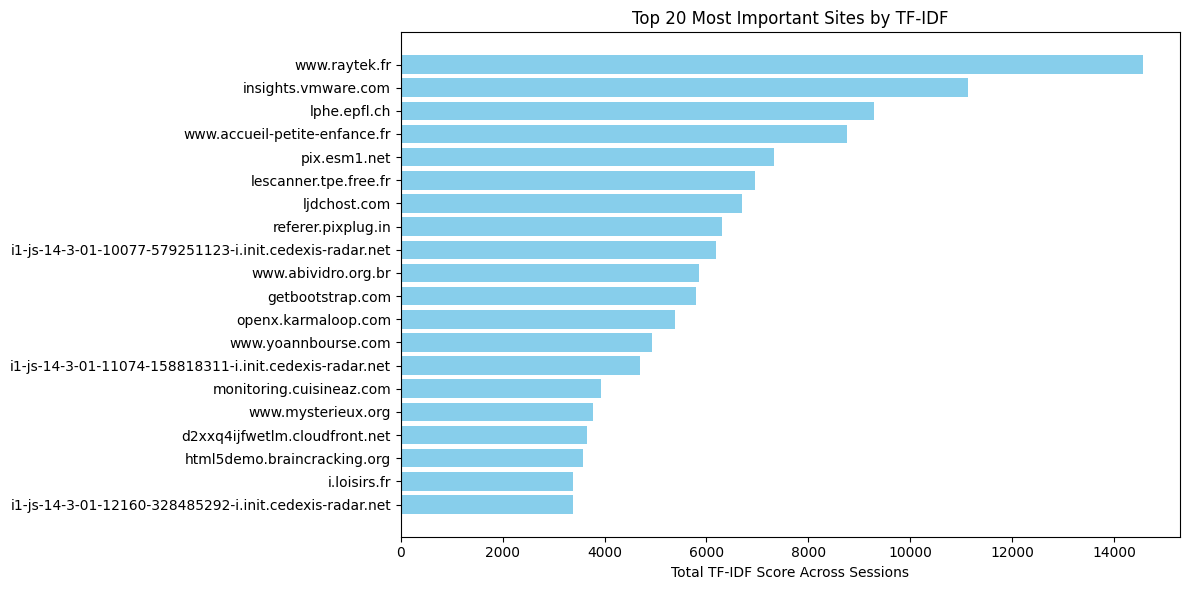

In [94]:
site_tfidf_sum = np.array(X_tfidf.sum(axis=0)).flatten()

top_n = 20
top_indices = site_tfidf_sum.argsort()[::-1][:top_n]

top_site_ids = [list(id_to_site.keys())[i] for i in top_indices]
top_site_names = [id_to_site[site_id] for site_id in top_site_ids]
top_scores = site_tfidf_sum[top_indices]

plt.figure(figsize=(12, 6))
plt.barh(range(top_n), top_scores[::-1], color='skyblue')
plt.yticks(range(top_n), top_site_names[::-1])
plt.xlabel('Total TF-IDF Score Across Sessions')
plt.title(f'Top {top_n} Most Important Sites by TF-IDF')
plt.tight_layout()
plt.show()


In [95]:
all_sites = train_df[site_cols].values.flatten()
all_sites = all_sites[all_sites != 0]
site_counts = Counter(all_sites)
top_sites = site_counts.most_common(20)
site_ids, counts = zip(*top_sites)

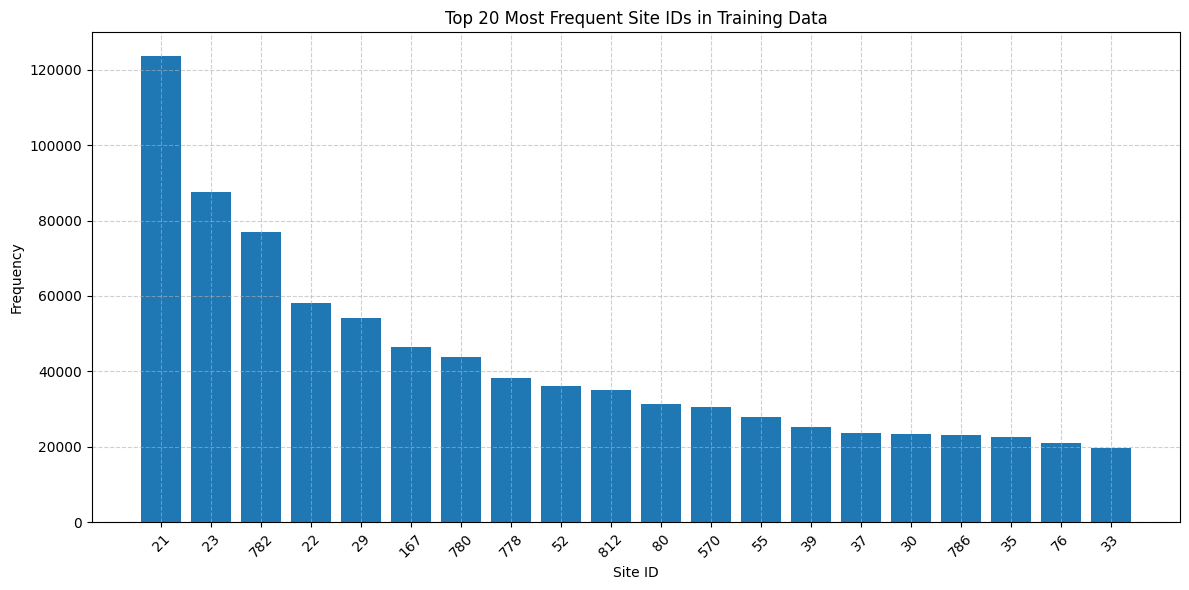

In [96]:
plt.figure(figsize=(12, 6))
plt.bar(range(len(site_ids)), counts, tick_label=site_ids)
plt.xticks(rotation=45)
plt.title("Top 20 Most Frequent Site IDs in Training Data")
plt.xlabel("Site ID")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**XGBoost**

In [105]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [115]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report

In [112]:
y = train_df['target'].astype(int).values
X_train, X_val, y_train, y_val = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

In [113]:
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',             # Specify AUC for XGBoost
    use_label_encoder=False,
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)

In [116]:
y_proba = xgb.predict_proba(X_val)[:, 1]
roc_auc = roc_auc_score(y_val, y_proba)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.91373539196481


**Logistic Regression**

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [119]:
X_train, X_val, y_train, y_val = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

In [120]:
lr = LogisticRegression(
    solver='liblinear',       # Good for small to medium sparse datasets
    random_state=42
)

lr.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [122]:
y_proba = lr.predict_proba(X_val)[:, 1]
roc_auc = roc_auc_score(y_val, y_proba)
print("ROC AUC Score (Logistic Regression):", roc_auc)

ROC AUC Score (Logistic Regression): 0.9521127877354716
